In [1]:
import numpy as np 
import pandas as pd 
import os
import torch
import matplotlib.pyplot as plt
import os
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt 
import torch.nn.functional as F 

data_dir = 'dataset'
#print(os.listdir(data_dir))
class_name=os.listdir(data_dir)

In [2]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from torchvision import transforms as T,datasets

In [3]:
class CNFG:
    epochs =20                             
    lr = 0.001                             
    batch_size = 16                        
    model_name = 'tf_efficientnet_b4_ns'    
    img_size = 224
    

device="mps"

In [4]:
data_transform = T.Compose([
                             T.Resize(size=(CNFG.img_size,CNFG.img_size)), # Resizing the image to be 224 by 224
                             T.RandomRotation(degrees=(-20,+20)), #Randomly Rotate Images by +/- 20 degrees, Image argumentation for each epoch
                             T.ToTensor(), #converting the dimension from (height,weight,channel) to (channel,height,weight) convention of PyTorch
                             T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225]) # Normalize by 3 means 3 StD's of the image net, 3 channels

])

In [5]:
data = datasets.ImageFolder(data_dir,       
                    transform=data_transform)
total_count = len(data)

In [6]:
train_count = int(0.6 * total_count) 
valid_count = int(0.3 * total_count)
test_count = total_count - train_count - valid_count
train_data, val_data, test_data = torch.utils.data.random_split(data, (train_count, valid_count, test_count))

In [7]:
def show_image(image,label,get_denormalize = True):
    
    image = image.permute(1,2,0)
    mean = torch.FloatTensor([0.485, 0.456, 0.406])
    std = torch.FloatTensor([0.229, 0.224, 0.225])
    
    if get_denormalize == True:
        image = image*std + mean
        image = np.clip(image,0,1)
        plt.imshow(image)
        plt.title(label)
        
    else: 
        plt.imshow(image)
        plt.title(label)

def show_grid(image,title = None):
    
    image = image.permute(1,2,0)
    mean = torch.FloatTensor([0.485, 0.456, 0.406])
    std = torch.FloatTensor([0.229, 0.224, 0.225])
    
    image = image*std + mean
    image = np.clip(image,0,1)
    
    plt.figure(figsize=[15, 15])
    plt.imshow(image)
    if title != None:
        plt.title(title)


def accuracy(y_pred,y_true):
    y_pred = F.softmax(y_pred,dim = 1)
    top_p,top_class = y_pred.topk(1,dim = 1)
    equals = top_class == y_true.view(*top_class.shape)
    return torch.mean(equals.type(torch.FloatTensor))
def view_classify(image,ps,label):
    
    class_name = ['NORMAL', 'PNEUMONIA']
    classes = np.array(class_name)

    ps = ps.cpu().data.numpy().squeeze()
    
    image = image.permute(1,2,0)
    mean = torch.FloatTensor([0.485, 0.456, 0.406])
    std = torch.FloatTensor([0.229, 0.224, 0.225])
    
    
    image = image*std + mean
    img = np.clip(image,0,1)
    
    fig, (ax1, ax2) = plt.subplots(figsize=(8,12), ncols=2)
    ax1.imshow(img)
    ax1.set_title('Ground Truth : {}'.format(class_name[label]))
    ax1.axis('off')
    ax2.barh(classes, ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(classes)
    ax2.set_yticklabels(classes)
    ax2.set_title('Predicted Class')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

    return None

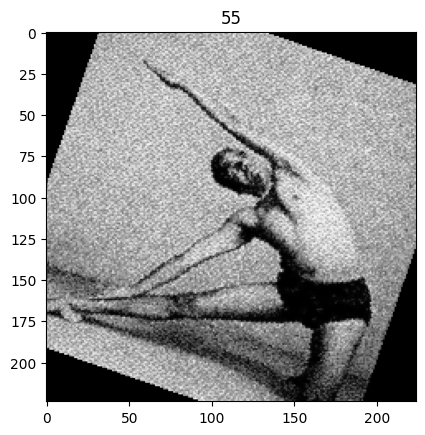

In [8]:
img, label = train_data[0]
show_image(img, label)

In [9]:
trainloader = DataLoader(train_data,batch_size=CNFG.batch_size,shuffle=True)
print("No. of batches in trainloader:{}".format(len(trainloader))) 
print("No. of Total examples:{}".format(len(trainloader.dataset)))

validationloader = DataLoader(val_data,batch_size=CNFG.batch_size,shuffle=True)
print("No. of batches in validationloader:{}".format(len(validationloader)))  
print("No. of Total examples:{}".format(len(validationloader.dataset)))

testloader = DataLoader(test_data,batch_size=CNFG.batch_size,shuffle=True)
print("No. of batches in testloader:{}".format(len(testloader))) 
print("No. of Total examples:{}".format(len(testloader.dataset)))

No. of batches in trainloader:225
No. of Total examples:3594
No. of batches in validationloader:113
No. of Total examples:1797
No. of batches in testloader:38
No. of Total examples:600


In [10]:
class_name

['ashtanga namaskara',
 'chakravakasana',
 'eka pada rajakapotasana ii',
 'anantasana',
 'kapotasana',
 'hanumanasana',
 'parighasana',
 'marichyasana i',
 'tittibhasana',
 'janu sirsasana',
 'yoganidrasana',
 'kurmasana',
 'ananda balasana',
 'krounchasana',
 'phalakasana',
 'garbha pindasana',
 '.DS_Store',
 'adho mukha svanasana',
 'eka pada koundinyanasana i',
 'vajrasana',
 'padmasana',
 'virabhadrasana i',
 'salamba bhujangasana',
 'parivrtta trikonasana',
 'supta virasana',
 'lolasana',
 'supta baddha konasana',
 'upavistha konasana',
 'tolasana',
 'simhasana',
 'ardha pincha mayurasana',
 'ardha bhekasana',
 'camatkarasana',
 'malasana',
 'uttanasana',
 'urdhva mukha svanasana',
 'tadasana',
 'durvasasana',
 'eka pada koundinyanasana ii',
 'chaturanga dandasana',
 'virasana',
 'natarajasana',
 'ustrasana',
 'baddha konasana',
 'bhekasana',
 'matsyasana',
 'utthita hasta padangustasana',
 'parsva bakasana',
 'marichyasana iii',
 'dandasana',
 'tulasana',
 'utkatasana',
 'purvott

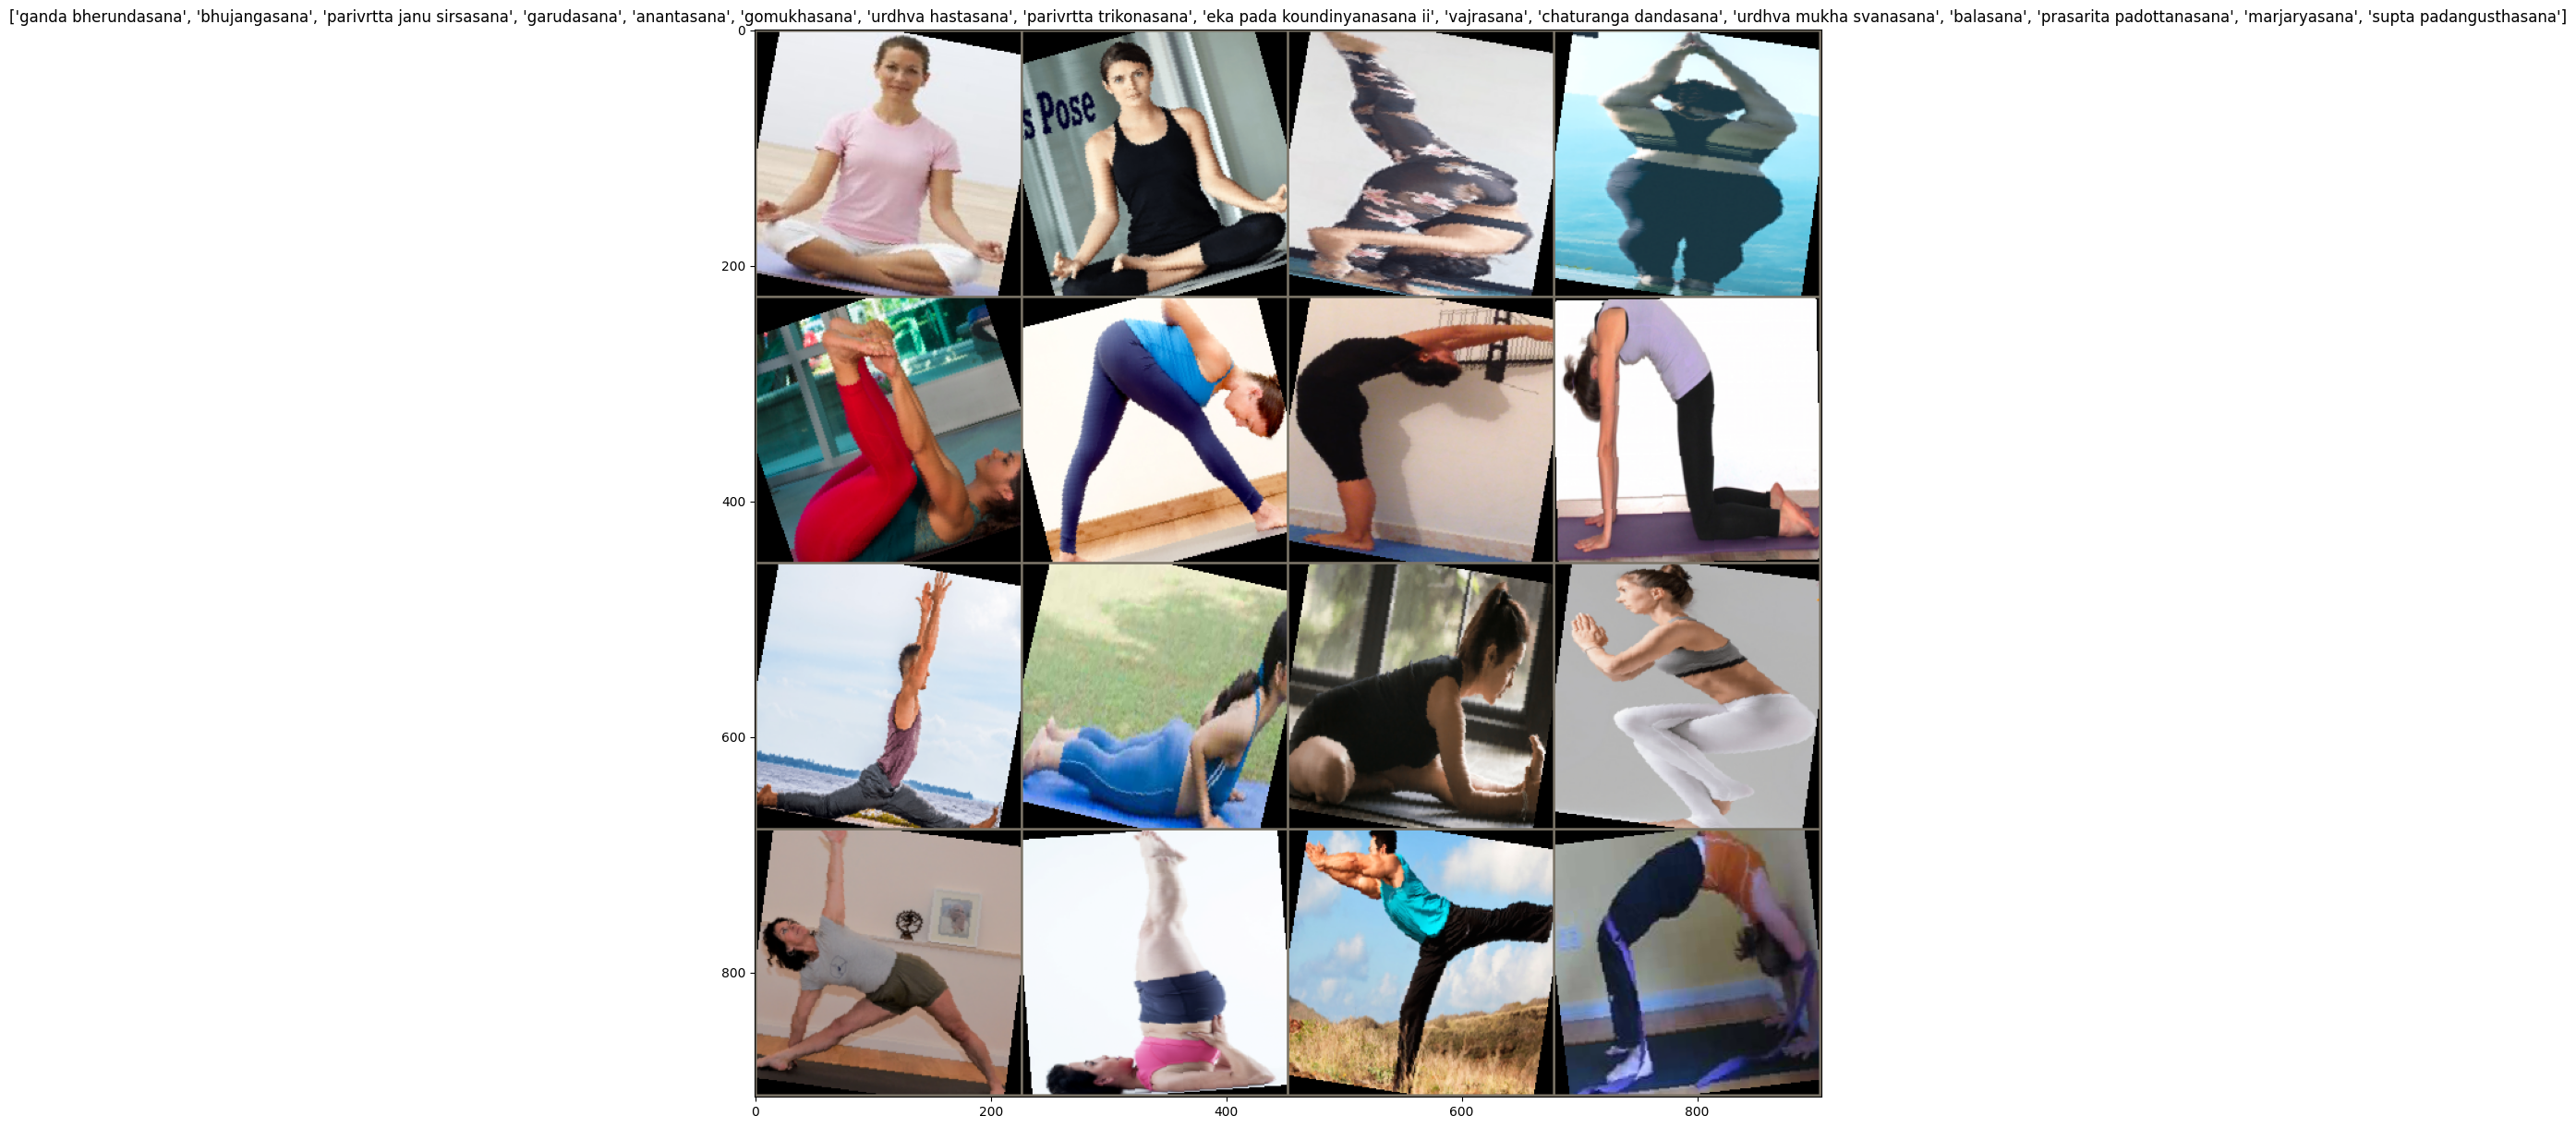

In [11]:
dataiter = iter(trainloader)
images,labels = next(dataiter)

out = make_grid(images,nrow=4)

show_grid(out,title = [class_name[x] for x in labels])

In [12]:
!pip install timm

In [13]:
from torch import nn
import torch.nn.functional as F
import timm # PyTorch Image Models

model = timm.create_model(CNFG.model_name,pretrained=True) #load pretrained model

In [14]:
len(class_name)

108

In [15]:

#Updating the pretrained model:
for param in model.parameters():
    param.requires_grad=False

model.to(device)
model.classifier = nn.Sequential(
    nn.Linear(in_features=1792, out_features=625), #1792 is the orginal in_features
    nn.ReLU(), #ReLu to be the activation function
    nn.Dropout(p=0.3),
    nn.Linear(in_features=625, out_features=256),
    nn.ReLU(),
    nn.Linear(in_features=256, out_features=107), 
)

In [16]:
!pip install torchsummary

In [17]:
from torchsummary import  summary
model.to(device)# move the model to GPU

EfficientNet(
  (conv_stem): Conv2dSame(3, 48, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (bn1): BatchNormAct2d(
    48, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
    (drop): Identity()
    (act): SiLU(inplace=True)
  )
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
        (bn1): BatchNormAct2d(
          48, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): SiLU(inplace=True)
        )
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
          (gate): Sigmoid()
        )
        (conv_pw): Conv2d(48, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNormAct2d(
          24, ep

In [18]:
class ModelTrainer():
    
    def __init__(self,criterion = None,optimizer = None,schedular = None):
        
        self.criterion = criterion
        self.optimizer = optimizer
        self.schedular = schedular
    
    def train_batch_loop(self,model,trainloader):
        
        train_loss = 0.0
        train_acc = 0.0
        
        for images,labels in tqdm(trainloader): 
            
            # move the data to CPU
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            loss = self.criterion(outputs,labels)
            
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            
            train_loss += loss.item()
            train_acc += accuracy(outputs,labels)
            
        return train_loss / len(trainloader), train_acc / len(trainloader) 

    
    def valid_batch_loop(self,model,validloader):
        
        valid_loss = 0.0
        valid_acc = 0.0
        
        for images,labels in tqdm(validloader):
            
            # move the data to CPU
            images = images.to(device) 
            labels = labels.to(device)
            
            outputs = model(images)
            loss = self.criterion(outputs,labels)
            
            valid_loss += loss.item()
            valid_acc += accuracy(outputs,labels)
            
        return valid_loss / len(validloader), valid_acc / len(validloader)
            
    def my_plot(epochs, loss):
        plt.plot(epochs,loss)

    def fit(self,model,trainloader,validloader,epochs):
        epochsSt = []
        train_loss = []
        train_acc =[]
        val_loss = []
        val_acc =[]

        valid_min_loss = np.Inf 
        
        for i in range(epochs):
            
            model.train() 
            avg_train_loss, avg_train_acc = self.train_batch_loop(model,trainloader) 
            
            model.eval()  
            avg_valid_loss, avg_valid_acc = self.valid_batch_loop(model,validloader) 
            
            if avg_valid_loss <= valid_min_loss :
                print("Valid_loss decreased {} --> {}".format(valid_min_loss,avg_valid_loss))
                torch.save(model.state_dict(),'YogaAsanas.pt')
                valid_min_loss = avg_valid_loss
            
            epochsSt.append(i)
            train_loss.append(avg_train_loss)
            train_acc.append(avg_train_acc)
            val_loss.append(avg_valid_loss)
            val_acc.append(avg_valid_acc)

                
            print("Epoch : {} Train Loss : {:.6f} Train Acc : {:.6f}".format(i+1, avg_train_loss, avg_train_acc))
            print("Epoch : {} Valid Loss : {:.6f} Valid Acc : {:.6f}".format(i+1, avg_valid_loss, avg_valid_acc))

        print("Epoch list:",epochsSt, "\n Train loss list:", train_loss ,"\n Train Accuracy list:", train_acc, "\n Val loss:", val_loss, "\n Val acc:", val_acc )

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = CNFG.lr)

trainer = ModelTrainer(criterion,optimizer)
trainer.fit(model,trainloader,validationloader,epochs = CNFG.epochs)

  0%|          | 0/225 [00:00<?, ?it/s]

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/PIL/Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


  0%|          | 0/113 [00:00<?, ?it/s]

Valid_loss decreased inf --> 4.228569739687759
Epoch : 1 Train Loss : 4.545099 Train Acc : 0.028222
Epoch : 1 Valid Loss : 4.228570 Valid Acc : 0.064712


  0%|          | 0/225 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

Valid_loss decreased 4.228569739687759 --> 3.6149774800359675
Epoch : 2 Train Loss : 3.859397 Train Acc : 0.094611
Epoch : 2 Valid Loss : 3.614977 Valid Acc : 0.131637


  0%|          | 0/225 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

Valid_loss decreased 3.6149774800359675 --> 3.3349797303697706
Epoch : 3 Train Loss : 3.376778 Train Acc : 0.174056
Epoch : 3 Valid Loss : 3.334980 Valid Acc : 0.181969


  0%|          | 0/225 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

Valid_loss decreased 3.3349797303697706 --> 3.2216985985241107
Epoch : 4 Train Loss : 3.039179 Train Acc : 0.225611
Epoch : 4 Valid Loss : 3.221699 Valid Acc : 0.186947


  0%|          | 0/225 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

Valid_loss decreased 3.2216985985241107 --> 3.0755773286903856
Epoch : 5 Train Loss : 2.840379 Train Acc : 0.269333
Epoch : 5 Valid Loss : 3.075577 Valid Acc : 0.233407


  0%|          | 0/225 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

Epoch : 6 Train Loss : 2.669354 Train Acc : 0.309333
Epoch : 6 Valid Loss : 3.098508 Valid Acc : 0.236173


  0%|          | 0/225 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

Valid_loss decreased 3.0755773286903856 --> 3.0389326241164083
Epoch : 7 Train Loss : 2.495977 Train Acc : 0.338500
Epoch : 7 Valid Loss : 3.038933 Valid Acc : 0.247898


  0%|          | 0/225 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

Valid_loss decreased 3.0389326241164083 --> 3.0102298048745215
Epoch : 8 Train Loss : 2.404469 Train Acc : 0.364667
Epoch : 8 Valid Loss : 3.010230 Valid Acc : 0.262168


  0%|          | 0/225 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

Epoch : 9 Train Loss : 2.271363 Train Acc : 0.394944
Epoch : 9 Valid Loss : 3.099584 Valid Acc : 0.245022


  0%|          | 0/225 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

Epoch : 10 Train Loss : 2.147008 Train Acc : 0.421278
Epoch : 10 Valid Loss : 3.087422 Valid Acc : 0.259513


  0%|          | 0/225 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

Epoch : 11 Train Loss : 2.103384 Train Acc : 0.435333
Epoch : 11 Valid Loss : 3.072702 Valid Acc : 0.282965


  0%|          | 0/225 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

Epoch : 12 Train Loss : 2.027301 Train Acc : 0.455000
Epoch : 12 Valid Loss : 3.052264 Valid Acc : 0.272788


  0%|          | 0/225 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

Epoch : 13 Train Loss : 1.934503 Train Acc : 0.464444
Epoch : 13 Valid Loss : 3.021810 Valid Acc : 0.287279


  0%|          | 0/225 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

Epoch : 14 Train Loss : 1.828492 Train Acc : 0.492833
Epoch : 14 Valid Loss : 3.054210 Valid Acc : 0.284292


  0%|          | 0/225 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

Epoch : 15 Train Loss : 1.765707 Train Acc : 0.507556
Epoch : 15 Valid Loss : 3.119996 Valid Acc : 0.283296


  0%|          | 0/225 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

Epoch : 16 Train Loss : 1.767281 Train Acc : 0.521500
Epoch : 16 Valid Loss : 3.138218 Valid Acc : 0.275442


  0%|          | 0/225 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

Epoch : 17 Train Loss : 1.742026 Train Acc : 0.516722
Epoch : 17 Valid Loss : 3.197652 Valid Acc : 0.281637


  0%|          | 0/225 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

Epoch : 18 Train Loss : 1.674793 Train Acc : 0.544889
Epoch : 18 Valid Loss : 3.080257 Valid Acc : 0.299336


  0%|          | 0/225 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

Epoch : 19 Train Loss : 1.588431 Train Acc : 0.551722
Epoch : 19 Valid Loss : 3.112669 Valid Acc : 0.283296


  0%|          | 0/225 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

Epoch : 20 Train Loss : 1.608147 Train Acc : 0.547889
Epoch : 20 Valid Loss : 3.094008 Valid Acc : 0.294580
Epoch list: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] 
 Train loss list: [4.545099362267388, 3.859396995968289, 3.376778169208103, 3.0391791979471843, 2.8403793054156834, 2.6693541140026515, 2.4959768931070965, 2.4044693168004354, 2.2713629484176634, 2.14700777636634, 2.1033843421936034, 2.0273009210162694, 1.9345032077365452, 1.8284916377067566, 1.765707431104448, 1.7672805457644993, 1.7420261817508274, 1.6747934937477111, 1.5884306377834745, 1.6081473808818394] 
 Train Accuracy list: [tensor(0.0282), tensor(0.0946), tensor(0.1741), tensor(0.2256), tensor(0.2693), tensor(0.3093), tensor(0.3385), tensor(0.3647), tensor(0.3949), tensor(0.4213), tensor(0.4353), tensor(0.4550), tensor(0.4644), tensor(0.4928), tensor(0.5076), tensor(0.5215), tensor(0.5167), tensor(0.5449), tensor(0.5517), tensor(0.5479)] 
 Val loss: [4.228569739687759, 3.6149774800359675,

In [20]:
# model.load_state_dict(torch.load('YogaAsanas.pt'))
# model.eval()

avg_test_loss, avg_test_acc = trainer.valid_batch_loop(model,testloader)


print("Test Loss : {}".format(avg_test_loss))
print("Test Acc : {}".format(avg_test_acc))

  0%|          | 0/38 [00:00<?, ?it/s]

Test Loss : 3.0956647333345915
Test Acc : 0.30921053886413574


In [21]:
train_loss = [4.545099362267388, 3.859396995968289, 3.376778169208103, 3.0391791979471843, 2.8403793054156834, 2.6693541140026515, 2.4959768931070965, 2.4044693168004354, 2.2713629484176634, 2.14700777636634, 2.1033843421936034, 2.0273009210162694, 1.9345032077365452, 1.8284916377067566, 1.765707431104448, 1.7672805457644993, 1.7420261817508274, 1.6747934937477111, 1.5884306377834745, 1.6081473808818394] 
train_Accuracy = [0.0282, 0.0946, 0.1741, 0.2256, 0.2693, 0.3093, 0.3385, 0.3647, 0.3949, 0.4213, 0.4353, 0.4550, 0.4644, 0.4928, 0.5076, 0.5215, 0.5167, 0.5449, 0.5517, 0.5479] 
Val_loss = [4.228569739687759, 3.6149774800359675, 3.3349797303697706, 3.2216985985241107, 3.0755773286903856, 3.0985083390126187, 3.0389326241164083, 3.0102298048745215, 3.099584298851216, 3.0874223076136764, 3.0727021894623747, 3.0522639593191907, 3.021809535743916, 3.0542103168183723, 3.119996434819382, 3.1382178142007473, 3.1976517333393604, 3.080256647768274, 3.1126694615963286, 3.094008228420156] 
Val_acc = [0.0647, 0.1316, 0.1820, 0.1869, 0.2334, 0.2362, 0.2479, 0.2622, 0.2450, 0.2595, 0.2830, 0.2728, 0.2873, 0.2843, 0.2833, 0.2754, 0.2816, 0.2993, 0.2833, 0.2946]

In [22]:
print(len(train_loss))
print(len(train_Accuracy))
print(len(Val_loss))
print(len(Val_acc))

20
20
20
20


Text(0.5, 1.0, 'Epochs VS val_acc')

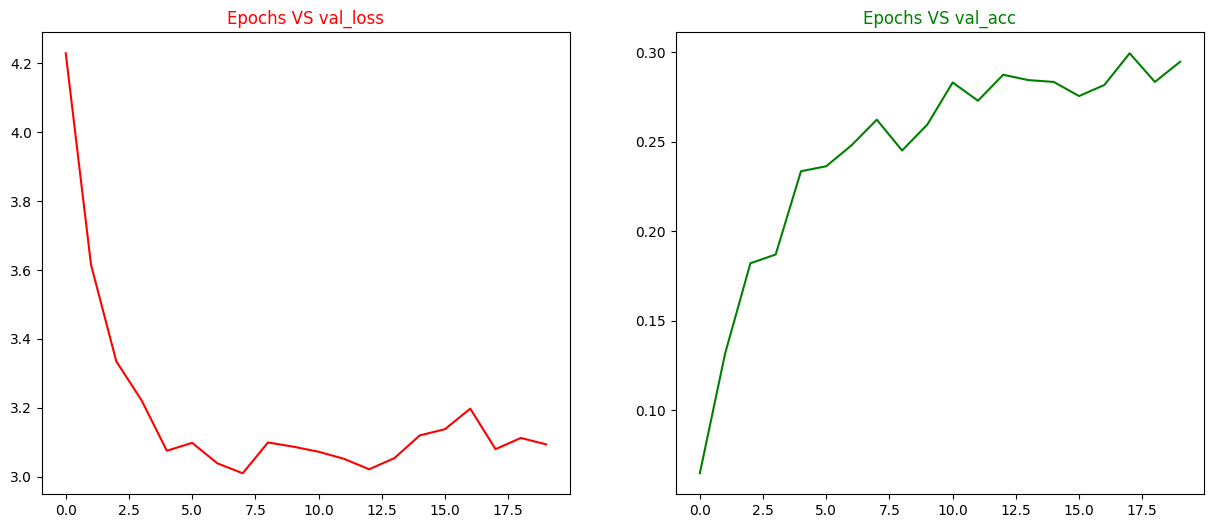

In [23]:
epochs = [i for i in range(20)]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
axes[0].plot(epochs, Val_loss, c='r')
axes[0].set_title('Epochs VS val_loss', c='r')

axes[1].plot(epochs, Val_acc, c='g')
axes[1].set_title('Epochs VS val_acc', c='g')